In [76]:
import pandas as pd
import numpy as np

In [77]:
churn_data = pd.read_csv("./customer_churn_large_dataset (1).csv")
churn_data.head(5)

CustomerID        Name  Age  Gender     Location   
0           1  Customer_1   63    Male  Los Angeles  \
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0

In [78]:
n_rows = churn_data.shape[0]
n_cols = churn_data.shape[1]
print(f"Rows :  {n_rows}  ,  Columns : {n_cols}")

Rows :  100000  ,  Columns : 9


***Cleaning and Analysing the Data***

In [79]:
print(f"There are {churn_data.isna().sum().sum()} number of Empty cells")


There are 0 number of Empty cells


In [80]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [81]:
churn_data.describe()

CustomerID            Age  Subscription_Length_Months   
count  100000.000000  100000.000000               100000.000000  \
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

In [82]:
numeric_data = churn_data.select_dtypes(include=[np.number])
categorical_data = churn_data.select_dtypes(exclude=[np.number])

numeric_data.corr(method='spearman')


CustomerID       Age  Subscription_Length_Months   
CustomerID                    1.000000 -0.001080                    0.005454  \
Age                          -0.001080  1.000000                    0.003378   
Subscription_Length_Months    0.005454  0.003378                    1.000000   
Monthly_Bill                  0.001265  0.001115                   -0.005292   
Total_Usage_GB               -0.004035  0.001920                   -0.002202   
Churn                        -0.004586  0.001555                    0.002330   

                            Monthly_Bill  Total_Usage_GB     Churn  
CustomerID                      0.001265       -0.004035 -0.004586  
Age                             0.001115        0.001920  0.001555  
Subscription_Length_Months     -0.005292       -0.002202  0.002330  
Monthly_Bill                    1.000000        0.003192 -0.000193  
Total_Usage_GB                  0.003192        1.000000 -0.002852  
Churn                          -0.000193       -0.002852  1.000000

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Subscription_Length_Months'}>,
        <Axes: title={'center': 'Monthly_Bill'}>],
       [<Axes: title={'center': 'Total_Usage_GB'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

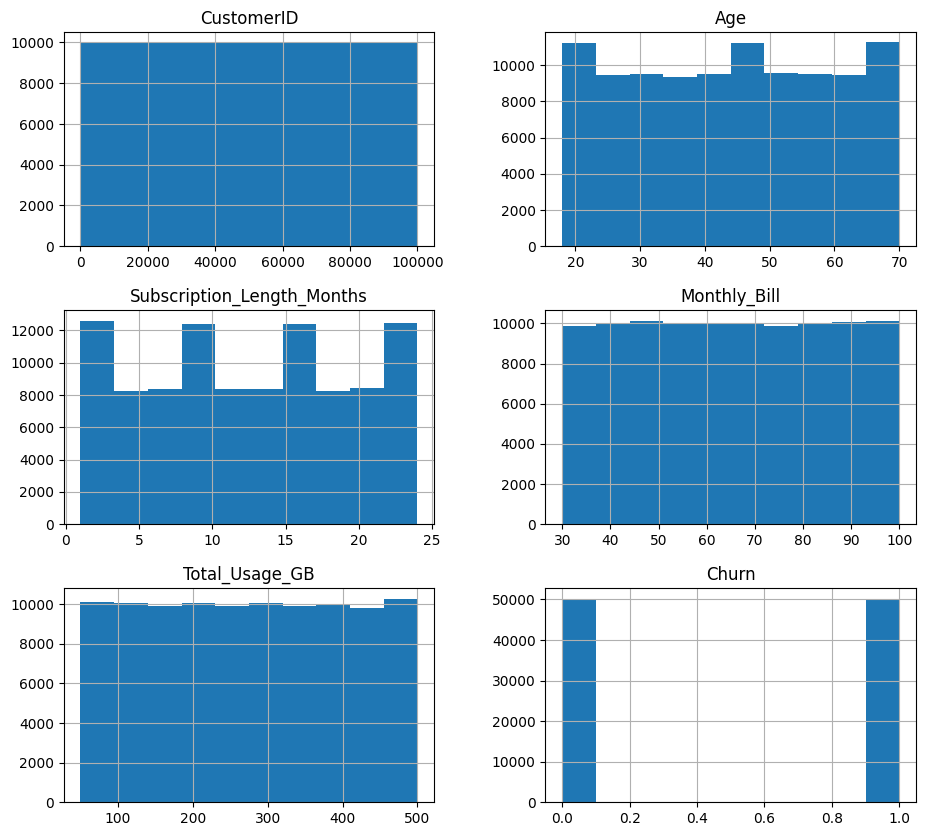

In [84]:
numeric_data.hist(figsize=(11,10))

<Axes: xlabel='Churn', ylabel='count'>

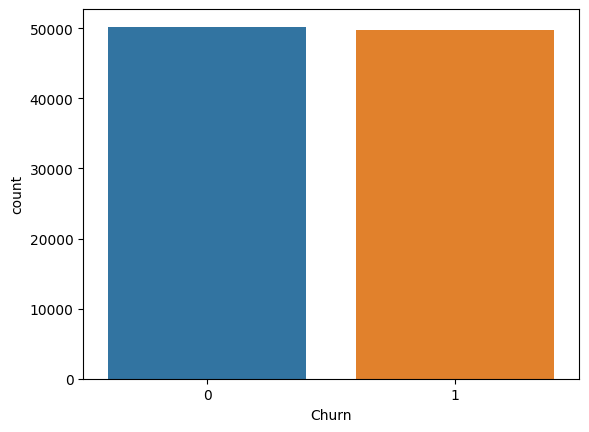

In [85]:
sns.countplot(x = numeric_data['Churn'])

**The dataset is equally distributed within churn or not churn**

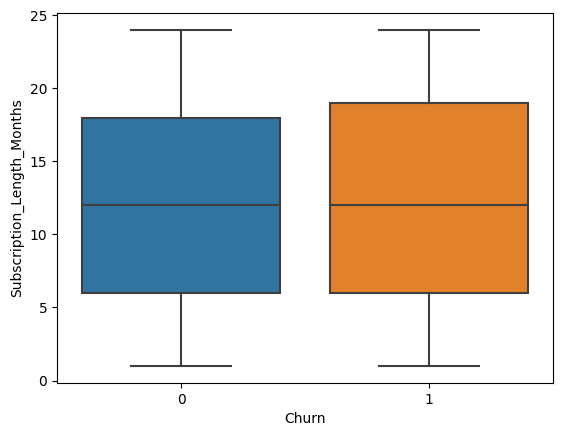

In [86]:
ax = sns.boxplot(x='Churn', y='Subscription_Length_Months', data=numeric_data.sample(1000))

In [87]:
ax = sns.boxplot(x='Churn', y='Total_Usage_GB', data=numeric_data.sample(1000))

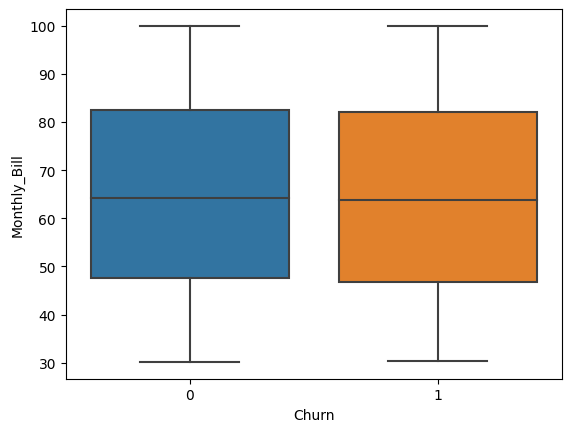

In [88]:
ax = sns.boxplot(x='Churn', y='Monthly_Bill', data=numeric_data.sample(1000))

In [89]:
import scipy.stats as stats

**Detecting outliers using Z-score method**

In [90]:
outliers=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 2: 
            outliers.append(i)
    print("Outliers:",outliers)
Zscore_outlier(numeric_data['Age'])

Outliers: []


Analysing churn or not churn based on gender

<Axes: xlabel='Churn', ylabel='count'>

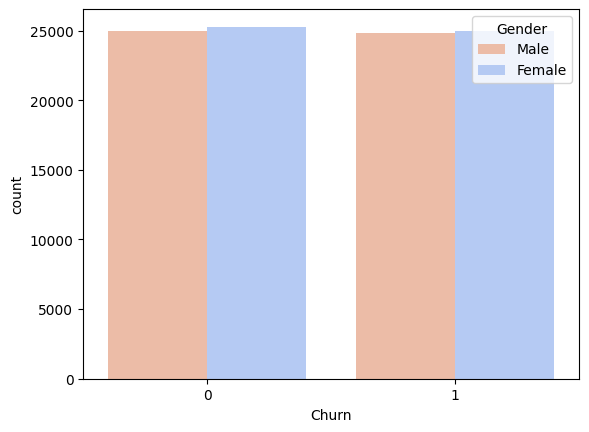

In [91]:
sns.countplot(x='Churn',data=churn_data,hue='Gender',palette="coolwarm_r")

In [92]:
px.violin(churn_data , x='Churn' , y='Subscription_Length_Months')

In [93]:
px.violin(churn_data , x='Churn' , y='Total_Usage_GB')

**Feature Engineering**  --> We can observe one of the important features can als be Total_Charged_Amount

In [94]:
total_charged_amount = churn_data['Subscription_Length_Months'] * churn_data['Monthly_Bill']
total_charged_amount

0        1247.12
1          48.76
2         427.35
3         293.82
4        1104.66
          ...   
99995    1267.99
99996    1171.35
99997    1633.87
99998     985.00
99999    1454.83
Length: 100000, dtype: float64

In [95]:
churn_data.insert(3,"Total_Amount_Charged",total_charged_amount)

In [96]:
churn_data

CustomerID             Name  Age  Total_Amount_Charged  Gender   
0               1       Customer_1   63               1247.12    Male  \
1               2       Customer_2   62                 48.76  Female   
2               3       Customer_3   24                427.35  Female   
3               4       Customer_4   36                293.82  Female   
4               5       Customer_5   46               1104.66  Female   
...           ...              ...  ...                   ...     ...   
99995       99996   Customer_99996   33               1267.99    Male   
99996       99997   Customer_99997   62               1171.35  Female   
99997       99998   Customer_99998   64               1633.87    Male   
99998       99999   Customer_99999   51                985.00  Female   
99999      100000  Customer_100000   27               1454.83  Female   

          Location  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB   
0      Los Angeles                          17         73.36             236  \
1         New York                           1         48.76             172   
2      Los Angeles                           5         85.47             460   
3            Miami                           3         97.94             297   
4            Miami                          19         58.14             266   
...            ...                         ...           ...             ...   
99995      Houston                          23         55.13             226   
99996     New York                          19         61.65             351   
99997      Chicago                          17         96.11             251   
99998     New York                          20         49.25             434   
99999  Los Angeles                          19         76.57             173   

       Churn  
0          0  
1          0  
2          0  
3          1  
4          0  
...      ...  
99995      1  
99996      0  
99997      1  
99998      1  
99999      1  

[100000 rows x 10 columns]

***Normalizationing and Dividing the Dataset***

In [97]:
input_cols = list(churn_data.columns[2:-1])
input_cols
output_cols = 'Churn'

In [98]:
input_df = churn_data[input_cols].copy()
output_df =churn_data[output_cols].copy()


**Dividing into numerical and categorical columns**

In [99]:
numeric_input_data = input_df.select_dtypes(include=[np.number])
categorical_input_data = input_df.select_dtypes(exclude=[np.number])
numeric_input_data

Age  Total_Amount_Charged  Subscription_Length_Months  Monthly_Bill   
0       63               1247.12                          17         73.36  \
1       62                 48.76                           1         48.76   
2       24                427.35                           5         85.47   
3       36                293.82                           3         97.94   
4       46               1104.66                          19         58.14   
...    ...                   ...                         ...           ...   
99995   33               1267.99                          23         55.13   
99996   62               1171.35                          19         61.65   
99997   64               1633.87                          17         96.11   
99998   51                985.00                          20         49.25   
99999   27               1454.83                          19         76.57   

       Total_Usage_GB  
0                 236  
1                 172  
2                 460  
3                 297  
4                 266  
...               ...  
99995             226  
99996             351  
99997             251  
99998             434  
99999             173  

[100000 rows x 5 columns]

*Scaling the Numerical features*

In [100]:
from sklearn.preprocessing import MaxAbsScaler

In [101]:
cols_scaled = ['Age' , 'Subscription_Length_Months' , 'Monthly_Bill' , 'Total_Usage_GB','Total_Amount_Charged']
categorical_cols = ['Gender' , 'Location']

In [102]:
minscaler = MaxAbsScaler()
minscaler = MaxAbsScaler().fit(input_df[cols_scaled])

In [103]:
input_df[cols_scaled] = minscaler.transform(input_df[cols_scaled])
input_df

Age  Total_Amount_Charged  Gender     Location   
0      0.900000              0.519737    Male  Los Angeles  \
1      0.885714              0.020321  Female     New York   
2      0.342857              0.178098  Female  Los Angeles   
3      0.514286              0.122449  Female        Miami   
4      0.657143              0.460367  Female        Miami   
...         ...                   ...     ...          ...   
99995  0.471429              0.528435    Male      Houston   
99996  0.885714              0.488160  Female     New York   
99997  0.914286              0.680915    Male      Chicago   
99998  0.728571              0.410499  Female     New York   
99999  0.385714              0.606300  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  
0                        0.708333        0.7336           0.472  
1                        0.041667        0.4876           0.344  
2                        0.208333        0.8547           0.920  
3                        0.125000        0.9794           0.594  
4                        0.791667        0.5814           0.532  
...                           ...           ...             ...  
99995                    0.958333        0.5513           0.452  
99996                    0.791667        0.6165           0.702  
99997                    0.708333        0.9611           0.502  
99998                    0.833333        0.4925           0.868  
99999                    0.791667        0.7657           0.346  

[100000 rows x 7 columns]

**One Hot Encoding Features**

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(input_df[categorical_cols])

OneHotEncoder(sparse_output=False)

In [106]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Gender_Female', 'Gender_Male', 'Location_Chicago', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York']


In [107]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
input_df

Age  Total_Amount_Charged  Gender     Location   
0      0.900000              0.519737    Male  Los Angeles  \
1      0.885714              0.020321  Female     New York   
2      0.342857              0.178098  Female  Los Angeles   
3      0.514286              0.122449  Female        Miami   
4      0.657143              0.460367  Female        Miami   
...         ...                   ...     ...          ...   
99995  0.471429              0.528435    Male      Houston   
99996  0.885714              0.488160  Female     New York   
99997  0.914286              0.680915    Male      Chicago   
99998  0.728571              0.410499  Female     New York   
99999  0.385714              0.606300  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB   
0                        0.708333        0.7336           0.472  \
1                        0.041667        0.4876           0.344   
2                        0.208333        0.8547           0.920   
3                        0.125000        0.9794           0.594   
4                        0.791667        0.5814           0.532   
...                           ...           ...             ...   
99995                    0.958333        0.5513           0.452   
99996                    0.791667        0.6165           0.702   
99997                    0.708333        0.9611           0.502   
99998                    0.833333        0.4925           0.868   
99999                    0.791667        0.7657           0.346   

       Gender_Female  Gender_Male  Location_Chicago  Location_Houston   
0                0.0          1.0               0.0               0.0  \
1                1.0          0.0               0.0               0.0   
2                1.0          0.0               0.0               0.0   
3                1.0          0.0               0.0               0.0   
4                1.0          0.0               0.0               0.0   
...              ...          ...               ...               ...   
99995            0.0          1.0               0.0               1.0   
99996            1.0          0.0               0.0               0.0   
99997            0.0          1.0               1.0               0.0   
99998            1.0          0.0               0.0               0.0   
99999            1.0          0.0               0.0               0.0   

       Location_Los Angeles  Location_Miami  Location_New York  
0                       1.0             0.0                0.0  
1                       0.0             0.0                1.0  
2                       1.0             0.0                0.0  
3                       0.0             1.0                0.0  
4                       0.0             1.0                0.0  
...                     ...             ...                ...  
99995                   0.0             0.0                0.0  
99996                   0.0             0.0                1.0  
99997                   0.0             0.0                0.0  
99998                   0.0             0.0                1.0  
99999                   1.0             0.0                0.0  

[100000 rows x 14 columns]

In [108]:
input_df.drop(['Gender'] , axis=1 , inplace=True)
input_df.drop(['Location'] , axis=1 , inplace=True)

**Dividing the Dataset into training and test sets**

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
input_train,input_test,train_target,test_target = train_test_split(input_df,output_df,test_size=0.2,random_state=42)

In [131]:

input_train

Age  Total_Amount_Charged  Subscription_Length_Months   
75721  0.685714              0.405614                    0.458333  \
80184  0.700000              0.220015                    0.541667   
19864  0.442857              0.068785                    0.208333   
76699  0.757143              0.157798                    0.166667   
92991  0.328571              0.822264                    1.000000   
...         ...                   ...                         ...   
32595  0.542857              0.664300                    0.833333   
29313  0.757143              0.483847                    0.500000   
37862  0.971429              0.213080                    0.541667   
53421  0.485714              0.515445                    0.541667   
42410  0.971429              0.141699                    0.458333   

       Monthly_Bill  Total_Usage_GB  Gender_Female  Gender_Male   
75721        0.8848           0.984            1.0          0.0  \
80184        0.4061           0.846            0.0          1.0   
19864        0.3301           0.552            1.0          0.0   
76699        0.9466           0.678            0.0          1.0   
92991        0.8221           0.608            1.0          0.0   
...             ...             ...            ...          ...   
32595        0.7970           0.236            0.0          1.0   
29313        0.9675           0.726            0.0          1.0   
37862        0.3933           0.274            0.0          1.0   
53421        0.9514           0.996            0.0          1.0   
42410        0.3091           0.696            0.0          1.0   

       Location_Chicago  Location_Houston  Location_Los Angeles   
75721               0.0               1.0                   0.0  \
80184               0.0               0.0                   0.0   
19864               0.0               0.0                   1.0   
76699               0.0               0.0                   0.0   
92991               0.0               0.0                   1.0   
...                 ...               ...                   ...   
32595               0.0               0.0                   0.0   
29313               0.0               0.0                   1.0   
37862               0.0               0.0                   0.0   
53421               0.0               0.0                   0.0   
42410               1.0               0.0                   0.0   

       Location_Miami  Location_New York  
75721             0.0                0.0  
80184             0.0                1.0  
19864             0.0                0.0  
76699             0.0                1.0  
92991             0.0                0.0  
...               ...                ...  
32595             1.0                0.0  
29313             0.0                0.0  
37862             1.0                0.0  
53421             1.0                0.0  
42410             0.0                0.0  

[20000 rows x 12 columns]

Training Logistic Regression Model

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model1 = LogisticRegression(solver='saga' , random_state=42)
model1.fit(input_train,train_target)

LogisticRegression(random_state=42, solver='saga')

In [114]:
pred = model1.predict(input_train)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(train_target,pred)


0.5035375

In [117]:
pred_test = model1.predict(input_test)
accuracy_score(test_target,pred_test)


0.5038

In [118]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train_target,pred,normalize='true')

<Axes: >

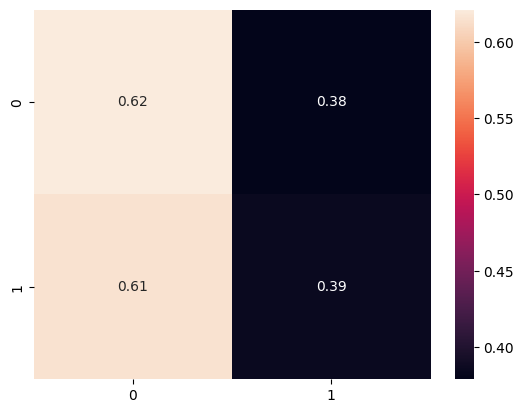

In [119]:
sns.heatmap(mat,annot = True)

In [120]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [121]:
print(f"F1 Score : {f1_score(test_target,pred_test)}  Recall : {recall_score(test_target,pred_test)} Precision : {recall_score(test_target,pred_test)}")

F1 Score : 0.43174530462666055  Recall : 0.38000201592581395 Precision : 0.38000201592581395


Training Random Forest Model

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=7,max_depth=20)
model2.fit(input_train,train_target)

RandomForestClassifier(max_depth=20, n_estimators=7, n_jobs=-1, random_state=42)

In [124]:
model2.score(input_train,train_target)

0.8487375

In [125]:
model2.score(input_test,test_target)


0.5003

Training SVM

In [153]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'rbf', random_state = 42)
model4.fit(input_train,train_target)

SVC(random_state=42)

In [154]:
y_pred4 = model4.predict(input_test)
accuracy_score(test_target,y_pred4)

Training a Neural Network

In [126]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [127]:
model3 = Sequential()
model3.add(Dense(256, activation='relu',input_shape = [input_train.shape[1]]))
model3.add(Dense(202,activation = 'relu'))
model3.add(Dense(112,activation = 'relu'))
model3.add(Dense(38,activation='sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 202)               51914     
                                                                 
 dense_2 (Dense)             (None, 112)               22736     
                                                                 
 dense_3 (Dense)             (None, 38)                4294      
                                                                 
Total params: 82,272
Trainable params: 82,272
Non-trainable params: 0
_________________________________________________________________


In [128]:
model3.compile(optimizer='adam' , loss = 'mae')

In [129]:
history = model3.fit(input_train,train_target,validation_data=(input_test,test_target),batch_size=250,epochs=17)

Epoch 1/17
320/320 [==============================] - 4s 7ms/step - loss: 0.5001 - val_loss: 0.4996
Epoch 2/17
320/320 [==============================] - 1s 4ms/step - loss: 0.4996 - val_loss: 0.4972
Epoch 3/17
320/320 [==============================] - 2s 6ms/step - loss: 0.4981 - val_loss: 0.4978
Epoch 4/17
320/320 [==============================] - 2s 6ms/step - loss: 0.4982 - val_loss: 0.4977
Epoch 5/17
320/320 [==============================] - 2s 5ms/step - loss: 0.4964 - val_loss: 0.5000
Epoch 6/17
320/320 [==============================] - 2s 6ms/step - loss: 0.4957 - val_loss: 0.4993
Epoch 7/17
320/320 [==============================] - 2s 7ms/step - loss: 0.4971 - val_loss: 0.5000
Epoch 8/17
320/320 [==============================] - 2s 7ms/step - loss: 0.4968 - val_loss: 0.4991
Epoch 9/17
320/320 [==============================] - 2s 6ms/step - loss: 0.4959 - val_loss: 0.4990
Epoch 10/17
320/320 [==============================] - 2s 6ms/step - loss: 0.4958 - val_loss: 0.4980

<Axes: >

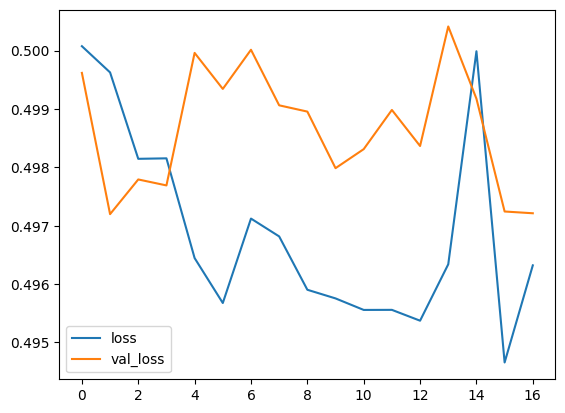

In [130]:

loss_df = pd.DataFrame(history.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [144]:
def input(finalarray):
    final = {
    "Gender" : finalarray[0][0],
    "Age"  : finalarray[0][1],
    "Subscription_Length_Months" : finalarray[0][2],
    "Monthly_Bill" : finalarray[0][3],
    "Location" : finalarray[0][4],
    "Total_Usage_GB" : finalarray[0][5],
    "Total_Amount_Charged" : float(finalarray[0][2]) * float(finalarray[0][3])

    } 
    new_input_df = pd.DataFrame([final])
    new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])
    new_input_df[cols_scaled] = minscaler.transform(new_input_df[cols_scaled])
    x_input = new_input_df[cols_scaled + encoded_cols]
    return x_input 

In [147]:
finalarray = [np.array(["Female",65,10,35.4,"Miami",75])]
finalarray

[array(['Female', '65', '10', '35.4', 'Miami', '75'], dtype='<U32')]

In [148]:
input(finalarray)

Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB   
0  0.928571                    0.416667         0.354            0.15  \

   Total_Amount_Charged  Gender_Female  Gender_Male  Location_Chicago   
0               0.14753            1.0          0.0               0.0  \

   Location_Houston  Location_Los Angeles  Location_Miami  Location_New York  
0               0.0                   0.0             1.0                0.0

In [ ]:
import pickle

pickle.dump(model3,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))